In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']


In [2]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

mean_metric_name = "max_performance"
task = "xor"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

csv_names = [
    'xor_d/',

    'xor_b/',
    'xor_c/',
    'xor_f/',
    'xor_a/',
    'xor_e/',
]

num_layerss = [2, 3, 4, 4, 5, 6]
num_neuronss = [16, 18, 20, 22, 24, 25]
inds = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
csv_names = [
    'xor_d/2023-08-08-12-53-11_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'xor_b/2023-08-07-15-15-45_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'xor_c/2023-08-07-16-15-08_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'xor_f/2023-08-08-15-32-28_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'xor_a/2023-04-10-17-25-10_all_results_from_xor_teach_archs_results_no_duplicates.csv',
    'xor_e/2023-08-08-12-55-35_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv'
]
results = []
for i, csv_name in enumerate(csv_names):
    results.append(pd.read_csv(f"{results_path}/{csv_name}"))

In [5]:
for r in results:
    print(r.shape)

(25634, 16)
(23315, 16)
(23216, 16)
(29691, 16)
(15279, 14)
(30327, 16)


In [6]:
results[-3].shape

(29691, 16)

In [5]:
results[-3][['exp_name', 'modularity', 'entropy', 'normed_entropy',
       'num_connections', 'connectivity_ratio', 'motifs_count_0',
       'motifs_count_1', 'motifs_count_2']].to_csv( '/Volumes/noamaz/modularity/xor/xor_4_layers_6_5_3/2023-08-08-15-32-28_first_analsis_general_no_duplicates.csv',index=False)

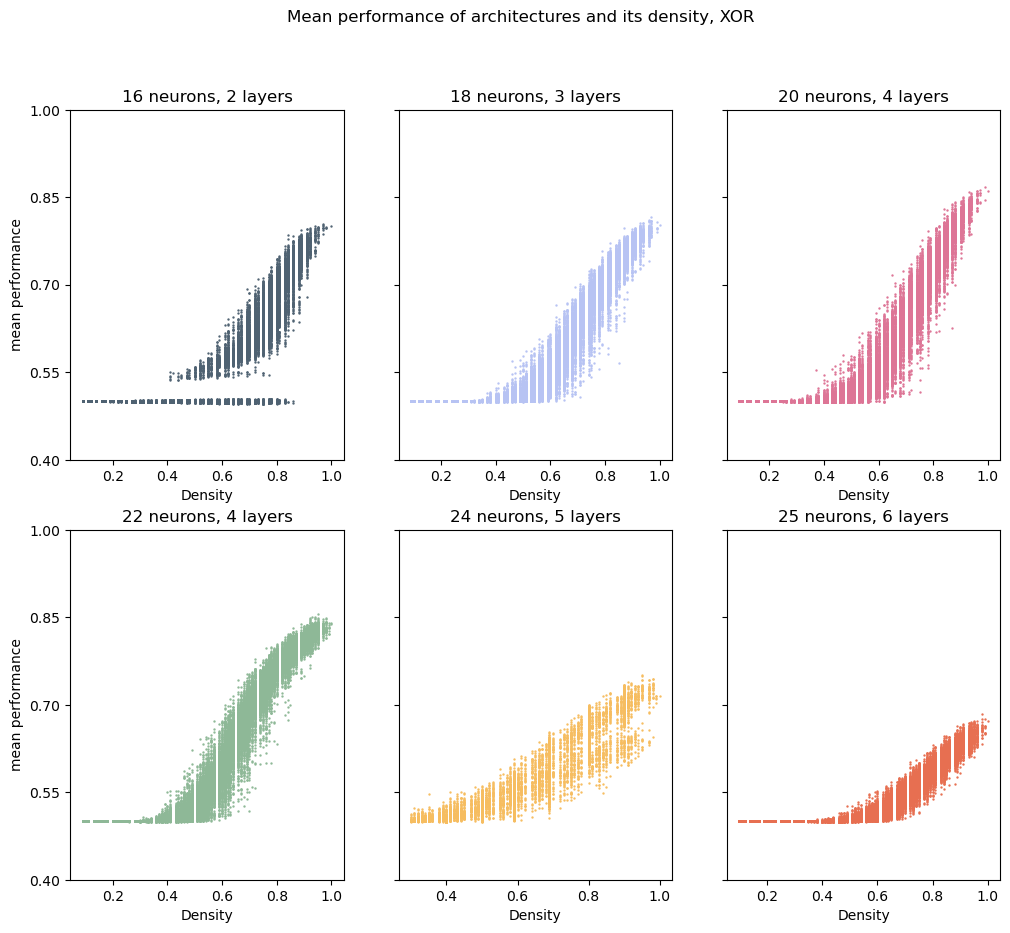

In [5]:
mean_metric_name = 'mean_performance'
metric_name = 'connectivity_ratio'
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, (result_df, num_neuron, num_layers, ind) in enumerate(zip(results, num_neuronss, num_layerss, inds)):
    j, k = ind
    axs[j, k].scatter(result_df[metric_name], result_df[mean_metric_name], c=COLORS[i],
                      s=0.5
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance, result_df[mean_metric_name].min())

    axs[j, k].set_xlabel('Density')
y_tixs = np.linspace(np.floor(min_mean_performance * 10) / 10, max_mean_performance, 5)
for j, k in inds:
    axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'mean performance')
axs[1, 0].set_ylabel(f'mean performance')
fig.suptitle(f'Mean performance of architectures and its density, XOR', wrap=True)
plt.savefig(
    f"{local_base_path}/plots/xor_multi_archs/{time_str}_{task}_{metric_name}_vs_{mean_metric_name}_multi_archs.png")
plt.show()


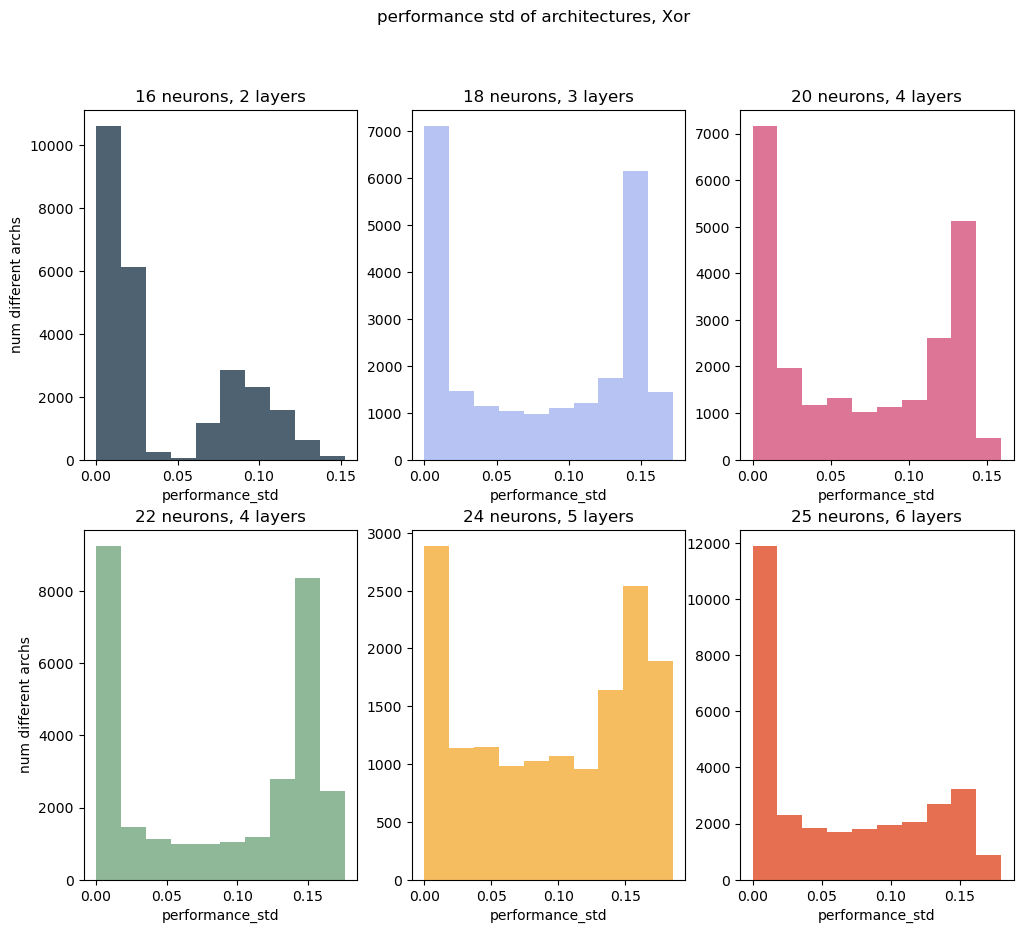

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), )
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    j, k = ind
    result_df = results[i]
    axs[j, k].hist(result_df['performance_std'], color=COLORS[i], )
    axs[j, k].set_xlabel('performance_std')
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
axs[0, 0].set_ylabel(f'num different archs')
axs[1, 0].set_ylabel(f'num different archs')
fig.suptitle(f'performance std of architectures, Xor', wrap=True)
plt.savefig(
    f"{local_base_path}/plots/xor_multi_archs/{time_str}_performance_std_multi_archs.png")
plt.show()

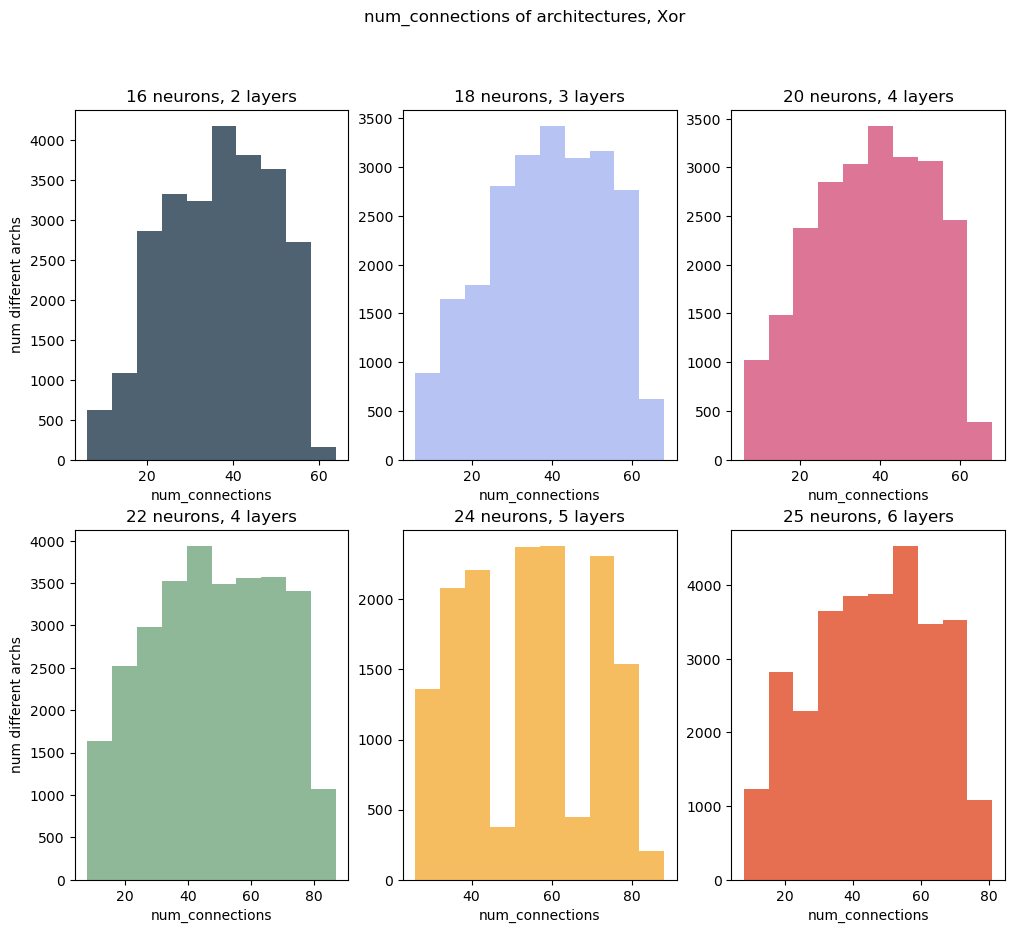

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), )
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    j, k = ind
    result_df = results[i]
    axs[j, k].hist(result_df['num_connections'], color=COLORS[i], )
    axs[j, k].set_xlabel('num_connections')
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
axs[0, 0].set_ylabel(f'num different archs')
axs[1, 0].set_ylabel(f'num different archs')
fig.suptitle(f'num_connections of architectures, Xor', wrap=True)
plt.show()

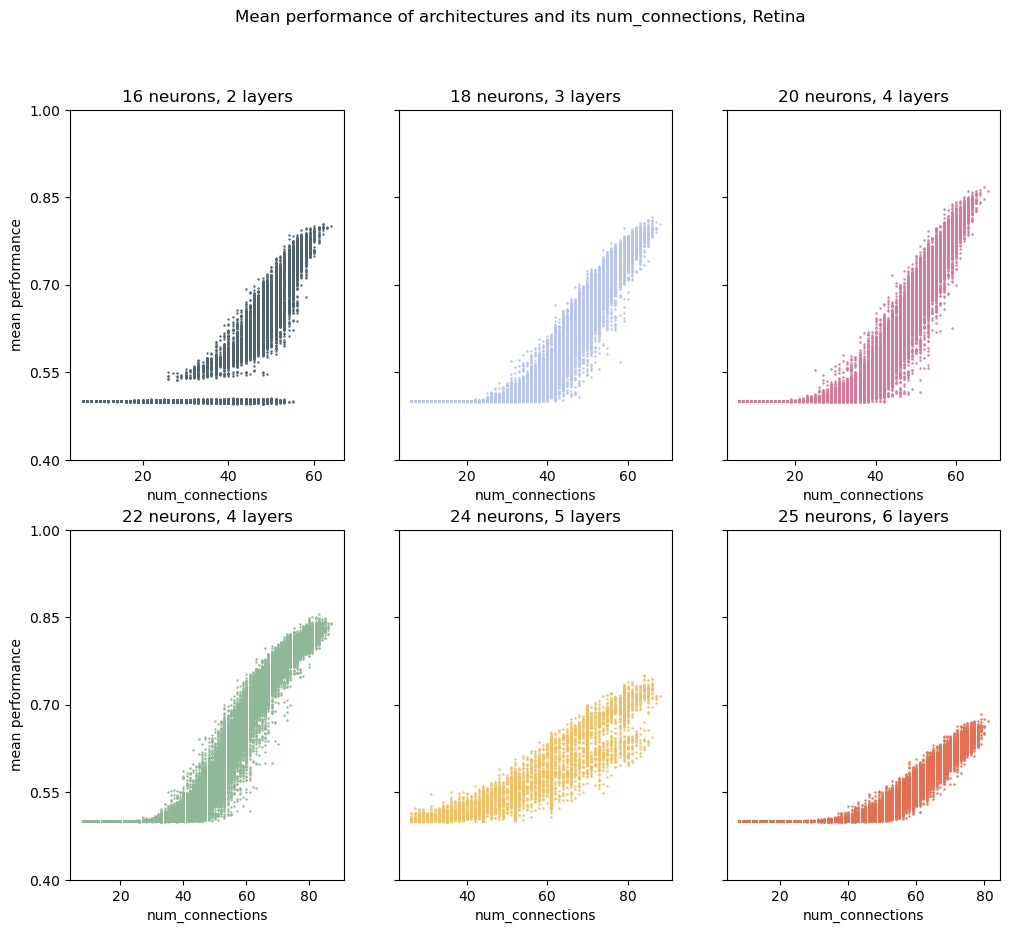

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    result_df = results[i]
    j, k = ind
    axs[j, k].scatter(result_df['num_connections'], result_df[mean_metric_name], c=COLORS[i],
                      s=0.5
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance, result_df[mean_metric_name].min())

    axs[j, k].set_xlabel('num_connections')
y_tixs = np.linspace(np.floor(min_mean_performance * 10) / 10, max_mean_performance, 5)
for j, k in inds:
    axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'mean performance')
axs[1, 0].set_ylabel(f'mean performance')
fig.suptitle(f'Mean performance of architectures and its num_connections, Retina', wrap=True)
plt.show()


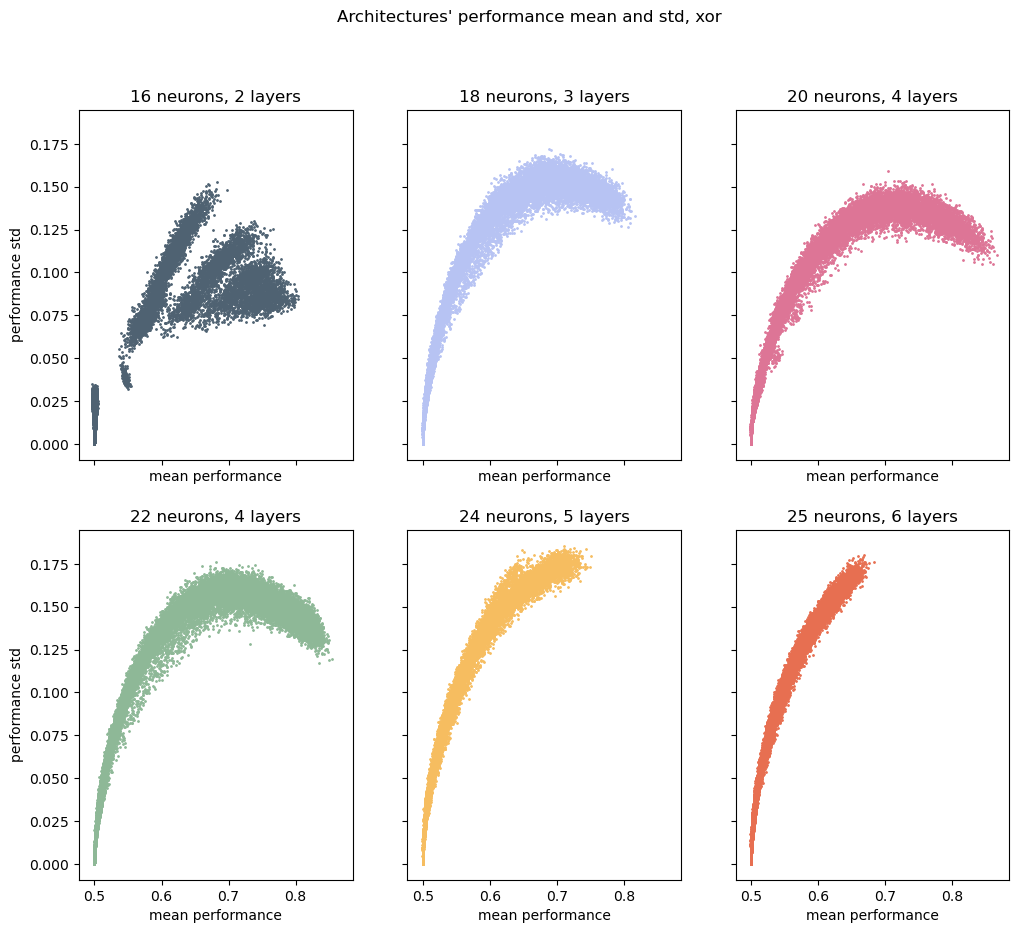

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all', sharex='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, ( num_neuron, num_layers, ind) in enumerate(zip( num_neuronss, num_layerss, inds)):
    result_df = results[i]
    j, k = ind
    axs[j, k].scatter(  result_df['mean_performance'], result_df['performance_std'], c=COLORS[i],
                      s=1.0
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance,result_df[mean_metric_name]. min() )

    axs[j, k].set_xlabel('mean performance')
y_tixs = np.linspace(np.floor(min_mean_performance *10)/10,max_mean_performance, 5)
#for j, k in inds:
 #   axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'performance std')
axs[1, 0].set_ylabel(f'performance std')
fig.suptitle(f"Architectures' performance mean and std, xor", wrap=True)
plt.savefig(
    f"{local_base_path}/plots/xor_multi_archs/{time_str}_{task}_archs_mean_and_std.png")
plt.show()
